<a href="https://colab.research.google.com/github/SaburGH/DL_Python/blob/master/Signal_Jam010525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

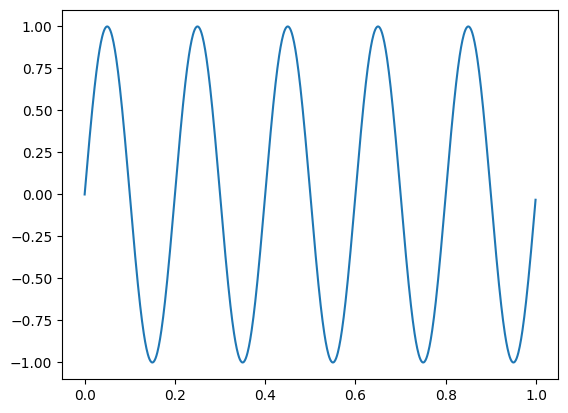

In [8]:

#Here's a basic example of how to add noise to a signal and then filter it using Python. We'll use NumPy for signal generation, Matplotlib for visualization, and SciPy for filtering.

#Step-by-step Example
#1. Generate a Clean Signal
import numpy as np
import matplotlib.pyplot as plt

# Time array
t = np.linspace(0, 1, 1000, endpoint=False)

# Original signal (e.g., 5 Hz sine wave)
signal = np.sin(2 * np.pi * 5 * t)
plt.plot(t,signal)

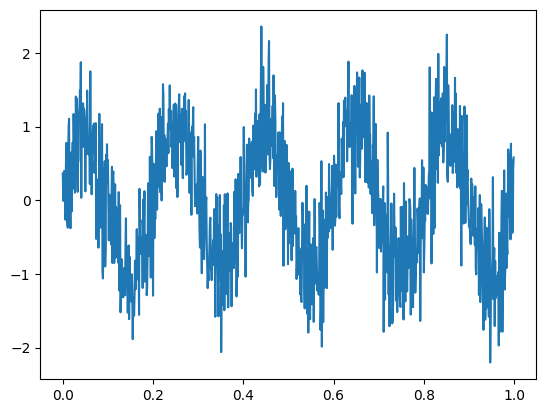

In [9]:
#2. Add Noise
# Add Gaussian noise
noise = np.random.normal(0, 0.5, signal.shape)
noisy_signal = signal + noise
plt.plot(t, noisy_signal)

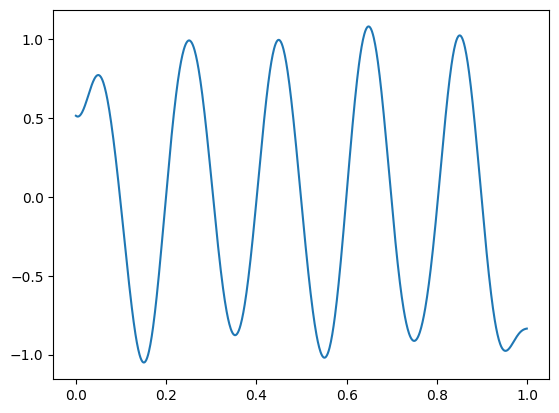

In [10]:

#3. Filter the Signal (Low-pass filter)
from scipy.signal import butter, filtfilt

# Butterworth filter design
def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter parameters
cutoff = 10  # Hz
fs = 1000  # Sampling frequency

# Apply filter
filtered_signal = butter_lowpass_filter(noisy_signal, cutoff, fs)
plt.plot(t,filtered_signal)

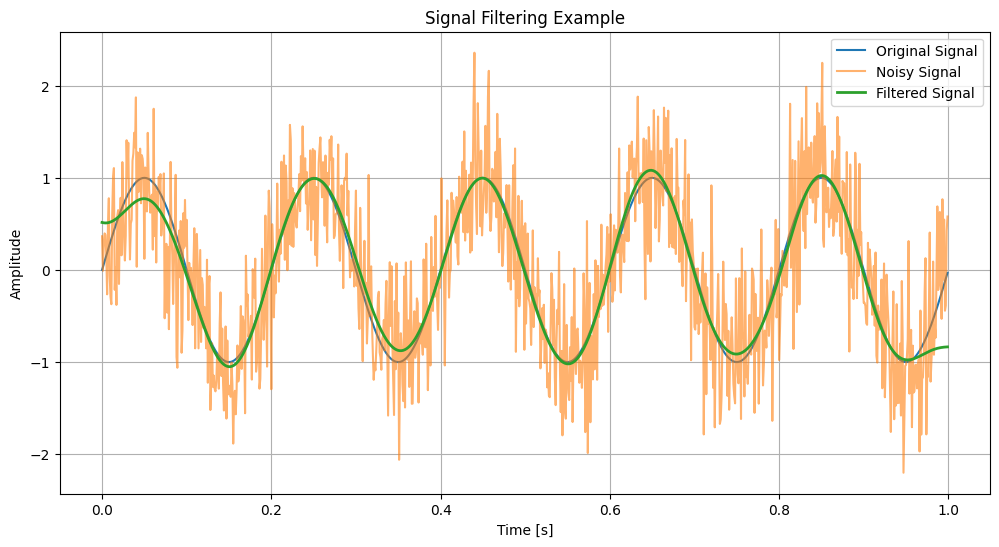

In [13]:
#4. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.6)
plt.plot(t, filtered_signal, label='Filtered Signal', linewidth=2)
plt.legend()
plt.title("Signal Filtering Example")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

#This creates a noisy signal and then removes high-frequency noise using a Butterworth low-pass filter.